# Final Project: Bank Loans Data
** By Rishi Dave and Carly Phelps **

**Data Summary**
*  The Data was taken from Kaggle (https://www.kaggle.com/zaurbegiev/my-dataset/metadata)
*  There are 19 variables and 100,000 observations
*  The 19 variables are : Loan ID, Customer ID, Loan Status, Current Loan Amount, Term, Credit Score, Annual Income, Years in current job, Home Ownership, Purpose, Monthly Debt, Years of Credit History, Months since last delinquent, Number of Open Accounts, Number of Credit Problems, Current Credit Balance, Maximum Open Credit, Brankruptcies, Tax Liens.
*  There is no metadata available for this data set but most of them are self explanatory.
*  The most important variable that we see is the Loan Status variable. This states whether the loan was fully paid off or had been charged off. Based on this variable we want to create a classification model that will predict whether someone should recieve a loan based on their credit history.

**The Data**
* Load the data 
* Prep the data

In [4]:
# Import Data

from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)
credit_df = sqlContext.sql("Select * from credit_csv")

In [5]:
#Replace Loan Status Column with Binary

from pyspark.sql.types import IntegerType
from pyspark.sql.functions import udf
from pyspark.sql.functions import *

ckdlabel = udf(lambda x: 1 if x == 'Charged Off' else 0, IntegerType())
credit_df = credit_df.withColumn("Loan Status", ckdlabel(credit_df["Loan Status"])) 
credit_df.select('Loan Status').show()

+-----------+
Loan Status|
+-----------+
 0|
 0|
 0|
 0|
 0|
 1|
 0|
 1|
 0|
 0|
 0|
 0|
 0|
 0|
 0|
 0|
 1|
 0|
 0|
 0|
+-----------+
only showing top 20 rows

**The Summary and Visualization**
* Summary of the Data Frame 
* Box Plots

In [7]:
display(credit_df.describe())

summary,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,100000,100000,100514,100000,100000,80846,80846,100000,100000,100000,100000,100000,100000,100000,100000,100000,99998,100000,100000
mean,null,null,0.2252323059474302,1.176044738946E7,null,1076.4560893550702,1378276.559842169,null,null,null,18472.412335799996,18.19914100000003,34.90132098422929,11.12853,0.16831,294637.38235,760798.381747635,0.11774018998757466,0.029312931293129313
stddev,null,null,0.41773729834176476,3.1783942546074856E7,null,1475.403791499053,1081360.195662305,null,null,null,12174.992609480196,7.015323649681334,21.997828782188034,5.009870360309759,0.4827049553720562,376170.9346661709,8384503.472368271,0.351423818218804,0.25818243623945547
min,0000757f-a121-41ed-b17b-162e76647c1f,00003c89-d86a-48a2-9f95-e1ec9d488ee1,0,10802,Long Term,585,76627,1 year,HaveMortgage,Business Loan,0.0,3.6,0,0,0,0,0,0,0
max,ffffe32e-ed17-459f-9cfd-7b9ee7972933,ffff6cf8-4779-48be-9fc1-5a93b6e16c2d,1,99999999,Short Term,7510,165557393,n/a,Rent,wedding,435843.28,70.5,NA,76,15,32878968,1539737892,NA,NA


In [8]:
#Hypothesis Testing 

#People with higher monthly debt are less likely to pay their loan off.
hypdebt=credit_df.groupby('Loan Status').mean('Monthly Debt')
hypdebt.show()

#People with a higher loan amount are less likely to pay their loan off.
hypamount=credit_df.groupby('Loan Status').mean('Current Loan Amount')
hypamount.show()

#People with lower income are less likely to pay off their loan off.
hypincome=credit_df.groupby('Loan Status').mean('Annual Income')
hypincome.show()

#People with more credit problems are less likely to pay their loan off.
hypincome=credit_df.groupby('Loan Status').mean('Number of Credit Problems')
hypincome.show()

+-----------+------------------+
Loan Status| avg(Monthly Debt)|
+-----------+------------------+
 1| 18650.5654936172|
 0|18420.277418466703|
+-----------+------------------+

+-----------+------------------------+
Loan Status|avg(Current Loan Amount)|
+-----------+------------------------+
 1| 324975.22682097263|
 0| 1.5106935339331187E7|
+-----------+------------------------+

+-----------+------------------+
Loan Status|avg(Annual Income)|
+-----------+------------------+
 1| 1267789.538698431|
 0| 1408157.15626375|
+-----------+------------------+

+-----------+------------------------------+
Loan Status|avg(Number of Credit Problems)|
+-----------+------------------------------+
 1| 0.17041388753920225|
 0| 0.1676943162575458|
+-----------+------------------------------+

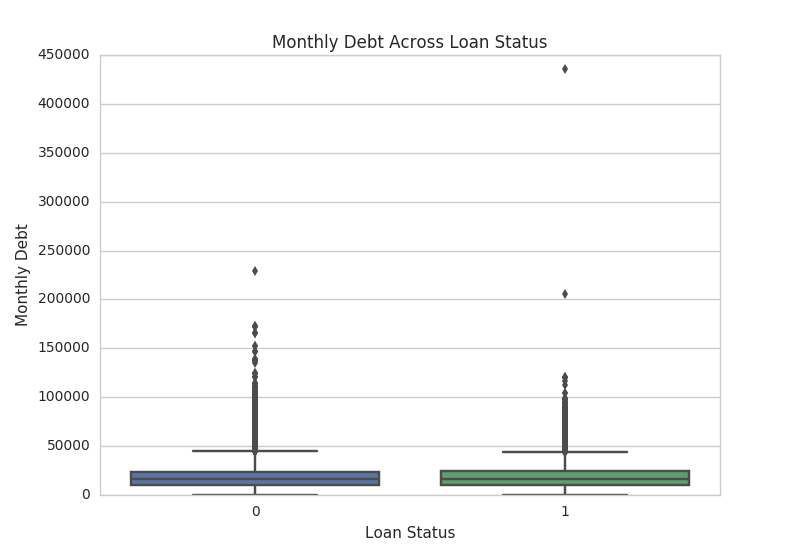

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

fig, ax = plt.subplots()
sns.set_style("whitegrid")

pandas_df = credit_df.select('Monthly Debt', 'Loan Status').toPandas()

md = sns.boxplot(x='Loan Status', y='Monthly Debt', data = pandas_df)

ax.set_title('Monthly Debt Across Loan Status')
ax.set(xlabel='Loan Status', ylabel='Monthly Debt')

display(fig)

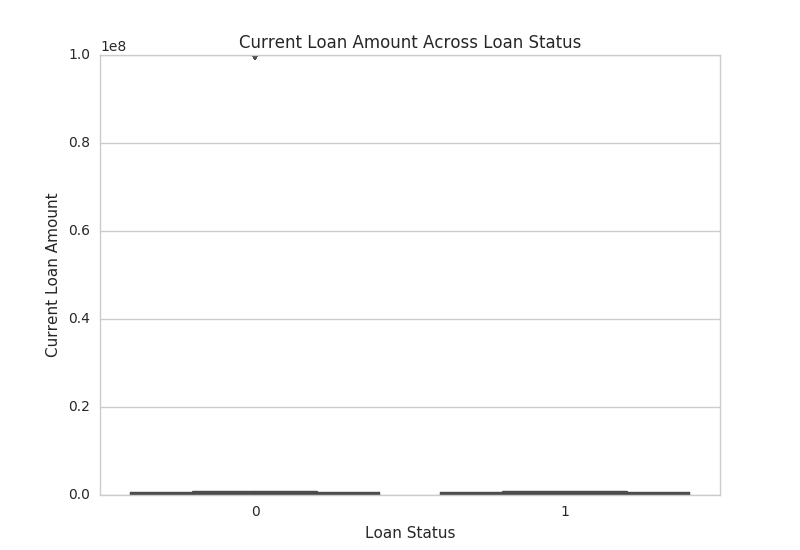

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

fig, ax = plt.subplots()
sns.set_style("whitegrid")

pandas_df = credit_df.select('Current Loan Amount', 'Loan Status').toPandas()

cla = sns.boxplot(x='Loan Status', y='Current Loan Amount', data = pandas_df)

ax.set_title('Current Loan Amount Across Loan Status')
ax.set(xlabel='Loan Status', ylabel='Current Loan Amount')

display(fig)

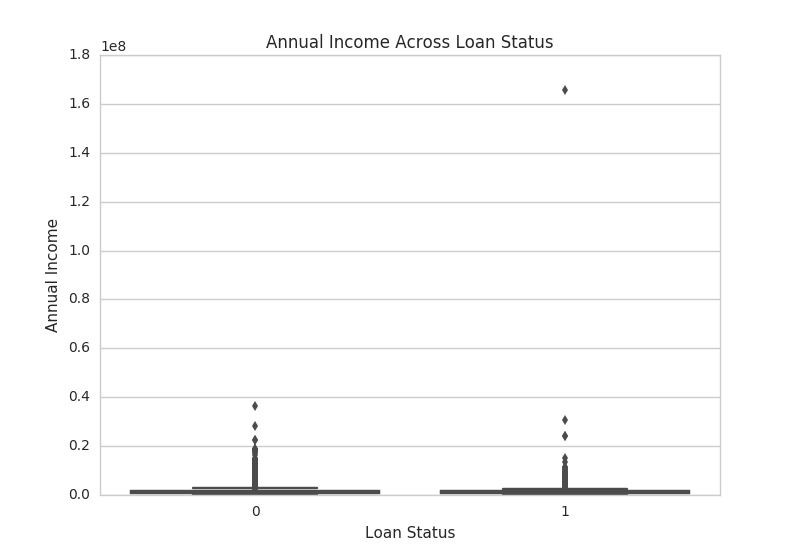

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

fig, ax = plt.subplots()
sns.set_style("whitegrid")

pandas_df = credit_df.select('Annual Income', 'Loan Status').toPandas()

ai = sns.boxplot(x='Loan Status', y='Annual Income', data = pandas_df)

ax.set_title('Annual Income Across Loan Status')
ax.set(xlabel='Loan Status', ylabel='Annual Income')

display(fig)

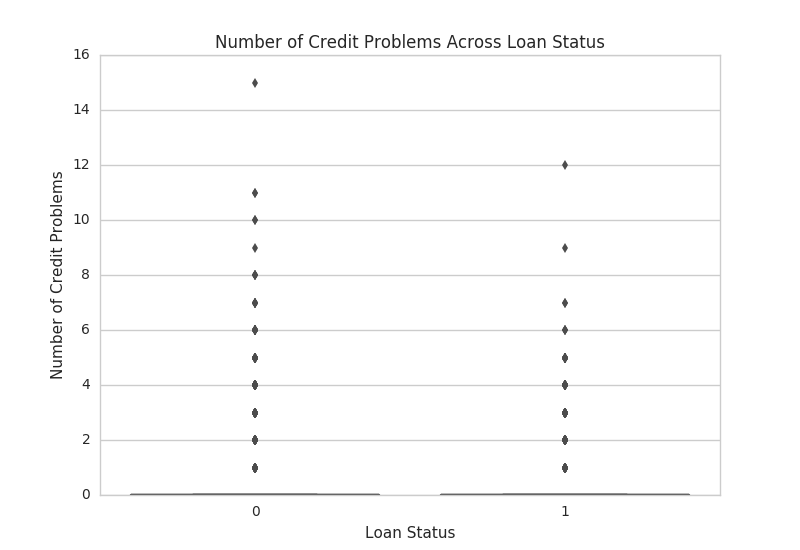

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

fig, ax = plt.subplots()
sns.set_style("whitegrid")

pandas_df = credit_df.select('Number of Credit Problems', 'Loan Status').toPandas()

md = sns.boxplot(x='Loan Status', y='Number of Credit Problems', data = pandas_df)

ax.set_title('Number of Credit Problems Across Loan Status')
ax.set(xlabel='Loan Status', ylabel='Number of Credit Problems')

display(fig)

** Hypothesis Testing Results **

After testing hypotheses, we came to the conclustion that our data is definitely skewed by outliers and that we will need to normalize the data in order to create an efficient model.

** Replacing Missing Numerical Variables **

In [15]:
#Setting the target variable

target = 'Loan Status'

In [16]:
# Categorical Variables

dtypes = credit_df.dtypes
cat_input = []
for i in range(0, len(credit_df.columns)):
  if dtypes[i][1] == 'string': #identify categorical variable
    cat_input.append(dtypes[i][0]) 
cat_input = list(set(cat_input)-set(target)) 
cat_input

Out[ 57 ]: 
['Bankruptcies',
 'Months since last delinquent',
 'Loan ID',
 'Term',
 'Tax Liens',
 'Home Ownership',
 'Years in current job',
 'Customer ID',
 'Purpose']

In [17]:
# Numerical Variables

num_input = list(set(credit_df.columns) - set([target]) - set(cat_input))
num_input

Out[ 58 ]: 
['Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Current Credit Balance',
 'Current Loan Amount',
 'Monthly Debt',
 'Number of Open Accounts',
 'Annual Income',
 'Credit Score']

In [18]:
from pyspark import keyword_only 
from pyspark.ml import Transformer
from pyspark.ml.param.shared import HasInputCol, HasOutputCol, Param
from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType, StringType
from pyspark.sql.functions import col

class MedianImputer(Transformer, HasInputCol, HasOutputCol):

    def __init__(self, inputCol=None, outputCol=None):
        super(MedianImputer, self).__init__()
        self.setParams(inputCol = inputCol , outputCol = outputCol)

        
    def setParams(self, inputCol=None, outputCol=None):
      return self._set(inputCol = inputCol, outputCol = outputCol)
        

    def _transform(self, dataset):
      from pyspark.sql.functions import when   
      out_col = self.getOutputCol()
      in_col = self.getInputCol()
      median_v = dataset.approxQuantile(in_col, [0.5], 0)[0] 
      dataset = dataset.fillna(median_v, subset=in_col)
      return dataset.withColumn(out_col, when(col(in_col).isNull(), median_v).otherwise(col(in_col)))

In [19]:
numericimputers = [MedianImputer(inputCol = column, outputCol = column) for column in num_input]
numericimputers

Out[ 60 ]: 
[MedianImputer_6ead15921c3f,
 MedianImputer_6054f7319705,
 MedianImputer_0ef5fe9ab587,
 MedianImputer_85a6ccaf9be2,
 MedianImputer_451ce987c704,
 MedianImputer_76faa8707d46,
 MedianImputer_f52bdb23c1ae,
 MedianImputer_2401bb2263a4,
 MedianImputer_076ef177726d]

** Replacing Missing Categorical Variables **

In [21]:
from pyspark import keyword_only  ## < 2.0 -> pyspark.ml.util.keyword_only
from pyspark.ml import Transformer
from pyspark.ml.param.shared import HasInputCol, HasOutputCol, Param
from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType, StringType
from pyspark.sql.functions import col

class ModeImputer(Transformer, HasInputCol, HasOutputCol):

    def __init__(self, inputCol=None, outputCol=None):
        super(ModeImputer, self).__init__()
        self.setParams(inputCol = inputCol , outputCol = outputCol)

        
    def setParams(self, inputCol=None, outputCol=None):
      return self._set(inputCol = inputCol, outputCol = outputCol)
        

    
    def _transform(self, dataset):
      from pyspark.sql.functions import when   
      out_col = self.getOutputCol()
      in_col = self.getInputCol()
      
      
      #Groupby column name in_col
      temp=dataset.groupby(in_col).count()
      temp = temp.filter(temp[in_col]!= 'null')
      #sort it and convert to pandas
      sorted_df=temp.sort(temp['count'].desc()).toPandas()
      #mode 
      mode_v=sorted_df.loc[0][in_col]
      
      return dataset.withColumn(out_col, when(col(in_col).isNull(), mode_v).otherwise(col(in_col)))

In [22]:
stringimputers = [ModeImputer(inputCol = column, outputCol = column) for column in cat_input]
stringimputers

Out[ 62 ]: 
[ModeImputer_23c994204310,
 ModeImputer_f04f3c2ea797,
 ModeImputer_4ee7782c8b3b,
 ModeImputer_a9c61bd7950d,
 ModeImputer_38feb3b66db6,
 ModeImputer_d74a6e08c28c,
 ModeImputer_39b3ca452944,
 ModeImputer_1c8f2bc8cce8,
 ModeImputer_2b7ff92f85c3]

** Normalize Variables **

In [24]:
# Normalize the Dataset

from pyspark import keyword_only 
from pyspark.ml import Transformer
from pyspark.ml.param.shared import HasInputCol, HasOutputCol, Param
from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType, StringType


class Standardizer(Transformer, HasInputCol, HasOutputCol):

    def __init__(self, inputCol=None, outputCol=None):
        super(Standardizer, self).__init__()
        self.setParams(inputCol = inputCol , outputCol = outputCol)

        
        
    def setParams(self, inputCol=None, outputCol=None):
      return self._set(inputCol = inputCol, outputCol = outputCol)
        

    def _transform(self, dataset):
      from pyspark.sql.functions import stddev, mean, col
      out_col = self.getOutputCol()
      in_col = dataset[self.getInputCol()]
      xmin, xmax = dataset.select(min(in_col), max(in_col)).first()
      return dataset.withColumn(out_col, (in_col - xmin)/(xmax-xmin))    


In [25]:
standardizers = [Standardizer(inputCol = column, outputCol = column+"_standardized") for column in num_input]
standardizers

Out[ 64 ]: 
[Standardizer_28bb3ead2d54,
 Standardizer_68c459c7eb12,
 Standardizer_3559fa5dd651,
 Standardizer_af13c46d68a3,
 Standardizer_5727ac6e7642,
 Standardizer_115708da8533,
 Standardizer_6394868e3e57,
 Standardizer_702f383d418d,
 Standardizer_5e4a5478f701]

** Create Dummy Variables **

In [27]:
from pyspark import keyword_only  
from pyspark.ml import Transformer
from pyspark.ml.param.shared import HasInputCol, HasOutputCol, Param
from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType, StringType
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.feature import StringIndexer

indexers = [StringIndexer(inputCol = column, outputCol = column+"_index") for column in cat_input]
encoders = [OneHotEncoder(inputCol = column+"_index", outputCol = column+"_dummy") for column in cat_input]

** Create Pipeline **

In [29]:
input_cols = []
for i in cat_input:
  input_cols.append(i+"_dummy")
for i in num_input:
  input_cols.append(i+"_standardized")
input_cols

Out[ 66 ]: 
['Bankruptcies_dummy',
 'Months since last delinquent_dummy',
 'Loan ID_dummy',
 'Term_dummy',
 'Tax Liens_dummy',
 'Home Ownership_dummy',
 'Years in current job_dummy',
 'Customer ID_dummy',
 'Purpose_dummy',
 'Years of Credit History_standardized',
 'Maximum Open Credit_standardized',
 'Number of Credit Problems_standardized',
 'Current Credit Balance_standardized',
 'Current Loan Amount_standardized',
 'Monthly Debt_standardized',
 'Number of Open Accounts_standardized',
 'Annual Income_standardized',
 'Credit Score_standardized']

In [30]:
from pyspark.ml.feature import StringIndexer
import functools 
import operator
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression

stages = []
assembler = VectorAssembler(inputCols= input_cols, outputCol="features") #conactenates all input variables and names as features [[0,1,0],30,20,40000]
stages = functools.reduce(operator.concat, [numericimputers, stringimputers, indexers, encoders, standardizers]) #indexers,  encoders, standardizers])
stages.append(assembler)
stages



Out[ 67 ]: 
[MedianImputer_6ead15921c3f,
 MedianImputer_6054f7319705,
 MedianImputer_0ef5fe9ab587,
 MedianImputer_85a6ccaf9be2,
 MedianImputer_451ce987c704,
 MedianImputer_76faa8707d46,
 MedianImputer_f52bdb23c1ae,
 MedianImputer_2401bb2263a4,
 MedianImputer_076ef177726d,
 ModeImputer_23c994204310,
 ModeImputer_f04f3c2ea797,
 ModeImputer_4ee7782c8b3b,
 ModeImputer_a9c61bd7950d,
 ModeImputer_38feb3b66db6,
 ModeImputer_d74a6e08c28c,
 ModeImputer_39b3ca452944,
 ModeImputer_1c8f2bc8cce8,
 ModeImputer_2b7ff92f85c3,
 StringIndexer_8f237137da99,
 StringIndexer_61c53cd26f1b,
 StringIndexer_b657dbb01b35,
 StringIndexer_f0e4bfb9ccf1,
 StringIndexer_bcc517c3d5f0,
 StringIndexer_df36731f6d91,
 StringIndexer_5bb69515ffd9,
 StringIndexer_d65911d1b4b3,
 StringIndexer_ffa90d506b6d,
 OneHotEncoder_70a80298a1a0,
 OneHotEncoder_9490eaa50fdd,
 OneHotEncoder_2f05956aeb38,
 OneHotEncoder_e13143423037,
 OneHotEncoder_2dcbf416d244,
 OneHotEncoder_24afb2d6afe8,
 OneHotEncoder_6d1990d0c958,
 OneHotEncoder_05925812c8b3,
 OneHotEncoder_3bff16ed5045,
 Standardizer_28bb3ead2d54,
 Standardizer_68c459c7eb12,
 Standardizer_3559fa5dd651,
 Standardizer_af13c46d68a3,
 Standardizer_5727ac6e7642,
 Standardizer_115708da8533,
 Standardizer_6394868e3e57,
 Standardizer_702f383d418d,
 Standardizer_5e4a5478f701,
 VectorAssembler_11e186191619]

** Run Pipeline **

In [32]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=stages)
credit_df = pipeline.fit(credit_df).transform(credit_df)

** Training & Testing Data **

In [34]:
train, test = credit_df.randomSplit([0.7, 0.3], seed = 2019)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 70367
Test Dataset Count: 30147

** Logistic Regression Model **

In [36]:
lr = LogisticRegression(labelCol=target, featuresCol="features", maxIter=10)
logRegModel = lr.fit(train)

In [37]:
logRegModel.transform(train).select('probability', 'prediction').toPandas()

Out[ 71 ]: 
 probability prediction
0 [0.999768920576, 0.000231079423554] 0.0
1 [0.999750754101, 0.000249245899488] 0.0
2 [0.999676896861, 0.000323103139444] 0.0
3 [0.999603381041, 0.000396618958757] 0.0
4 [0.999718365557, 0.000281634443005] 0.0
5 [0.999801943222, 0.000198056777785] 0.0
6 [0.00093796874253, 0.999062031257] 1.0
7 [0.999743260037, 0.00025673996327] 0.0
8 [0.999784447407, 0.000215552593279] 0.0
9 [0.999906905519, 9.30944814995e-05] 0.0
10 [0.999576498935, 0.000423501064909] 0.0
11 [0.999776050325, 0.000223949675153] 0.0
12 [0.000647084274241, 0.999352915726] 1.0
13 [0.000966791258539, 0.999033208741] 1.0
14 [0.000448131899498, 0.999551868101] 1.0
15 [0.999555287655, 0.000444712345308] 0.0
16 [0.999778209378, 0.000221790621896] 0.0
17 [0.999721289936, 0.000278710063849] 0.0
18 [0.999890141398, 0.000109858601769] 0.0
19 [0.000974727621067, 0.999025272379] 1.0
20 [0.000704105385395, 0.999295894615] 1.0
21 [0.999920180588, 7.98194123349e-05] 0.0
22 [5.99422406703e-05, 0.999940057759] 1.0
23 [0.999758502907, 0.000241497092618] 0.0
24 [0.999681262918, 0.000318737081831] 0.0
25 [3.87237706867e-05, 0.999961276229] 1.0
26 [0.999686108275, 0.00031389172515] 0.0
27 [0.999639373797, 0.000360626202886] 0.0
28 [0.999525904952, 0.00047409504848] 0.0
29 [0.999899276849, 0.000100723151344] 0.0
... ... ...
70337 [0.999944032561, 5.59674391356e-05] 0.0
70338 [0.999724088075, 0.000275911925366] 0.0
70339 [0.999740318087, 0.00025968191254] 0.0
70340 [0.999770693359, 0.000229306641424] 0.0
70341 [0.999596825659, 0.000403174340662] 0.0
70342 [0.999706292187, 0.000293707812735] 0.0
70343 [0.999787913223, 0.000212086777391] 0.0
70344 [4.36500971139e-05, 0.999956349903] 1.0
70345 [0.999912036795, 8.79632053486e-05] 0.0
70346 [0.000605852422112, 0.999394147578] 1.0
70347 [0.000846763851198, 0.999153236149] 1.0
70348 [0.999676429315, 0.000323570684975] 0.0
70349 [0.000729288394831, 0.999270711605] 1.0
70350 [0.999560350515, 0.000439649484991] 0.0
70351 [0.999892855936, 0.000107144063861] 0.0
70352 [0.999760942615, 0.000239057384884] 0.0
70353 [0.999648039018, 0.000351960981945] 0.0
70354 [0.999768643706, 0.000231356293926] 0.0
70355 [0.999675617189, 0.000324382811063] 0.0
70356 [0.000712578875032, 0.999287421125] 1.0
70357 [0.999776467408, 0.000223532591671] 0.0
70358 [0.999636104486, 0.000363895514423] 0.0
70359 [0.000592364877446, 0.999407635123] 1.0
70360 [0.999592825919, 0.00040717408123] 0.0
70361 [0.999910137144, 8.98628556618e-05] 0.0
70362 [0.000659015826961, 0.999340984173] 1.0
70363 [0.999874463247, 0.000125536753036] 0.0
70364 [0.000440614345449, 0.999559385655] 1.0
70365 [0.000714119748032, 0.999285880252] 1.0
70366 [0.999767990497, 0.000232009502868] 0.0

[70367 rows x 2 columns]

** Logistic Regression Model Parameters **

In [39]:
print("Coefficients: \n" + str(logRegModel.coefficientMatrix))
print("Intercept: " + str(logRegModel.interceptVector))

Coefficients: 
DenseMatrix([[-0.26899502, -0.14377677, -0.05397302, ..., -0.49853704,
 -7.16349675, 5.37030973]])
Intercept: [-1.27143512778]

** Training Performance Check **

In [41]:
summary = logRegModel.summary
accuracy = summary.accuracy
falsePositiveRate = summary.weightedFalsePositiveRate
truePositiveRate = summary.weightedTruePositiveRate
fMeasure = summary.weightedFMeasure()
precision = summary.weightedPrecision
recall = summary.weightedRecall
print("Accuracy: %s\nFPR: %s\nTPR: %s\nF-measure: %s\nPrecision: %s\nRecall: %s"
      % (accuracy, falsePositiveRate, truePositiveRate, fMeasure, precision, recall))

Accuracy: 1.0
FPR: 0.0
TPR: 1.0
F-measure: 1.0
Precision: 1.0
Recall: 1.0

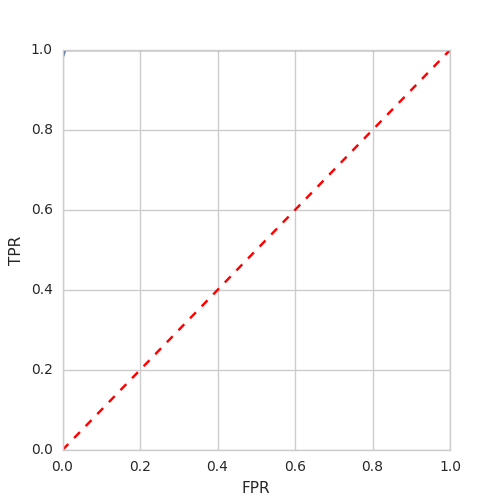

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(summary.roc.select('FPR').collect(),
         summary.roc.select('TPR').collect())
plt.xlabel('FPR')
plt.ylabel('TPR')
display(plt.show())

** Testing Performance Checks **

In [44]:
predictions = logRegModel.transform(test)
predictions = predictions.withColumnRenamed("Loan Status", "label")
predictions.select('label', 'rawPrediction', 'prediction', 'probability').show(30)


+-----+--------------------+----------+--------------------+
label| rawPrediction|prediction| probability|
+-----+--------------------+----------+--------------------+
 0|[5.30921965695051...| 0.0|[0.99507855578223...|
 0|[4.84606204161477...| 0.0|[0.99220202024501...|
 1|[4.568967418117,-...| 0.0|[0.98973774515530...|
 0|[8.50698656309757...| 0.0|[0.99979798903795...|
 1|[4.53129578154324...| 0.0|[0.98934797164274...|
 0|[5.14375994012742...| 0.0|[0.99419815138132...|
 0|[4.19135987596298...| 0.0|[0.98509967605406...|
 0|[6.25587327672537...| 0.0|[0.99808452680333...|
 0|[4.81322876265404...| 0.0|[0.99194383429477...|
 0|[5.92328486599718...| 0.0|[0.99733074983998...|
 0|[4.86773741056520...| 0.0|[0.99236794954709...|
 0|[3.84846022534311...| 0.0|[0.97913221751541...|
 0|[4.60794467991025...| 0.0|[0.99012617120456...|
 0|[4.31944904405620...| 0.0|[0.98686754319142...|
 0|[6.58358824450071...| 0.0|[0.99861903143524...|
 0|[8.05082520201144...| 0.0|[0.99968126291816...|
 1|[4.31628012461489...| 0.0|[0.98682641058331...|
 0|[9.63791057288881...| 0.0|[0.99993479508966...|
 0|[5.12310563618577...| 0.0|[0.99407778919391...|
 0|[7.95794328090714...| 0.0|[0.99965025040125...|
 0|[5.16352772257534...| 0.0|[0.99431106885984...|
 0|[8.08755526467653...| 0.0|[0.99969275422408...|
 0|[4.65515924228472...| 0.0|[0.99057723475125...|
 1|[4.48015746727443...| 0.0|[0.98879533841082...|
 1|[-1.2581721994395...| 1.0|[0.22128869837275...|
 1|[4.37034931787392...| 0.0|[0.98751112257488...|
 1|[-0.1344977808838...| 1.0|[0.46642615113299...|
 0|[6.68598726195065...| 0.0|[0.99875327450054...|
 0|[8.12589320781324...| 0.0|[0.99970430704153...|
 0|[6.87938156678037...| 0.0|[0.99897227722046...|
+-----+--------------------+----------+--------------------+
only showing top 30 rows

In [45]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.8269280682139571

** Conclusion **

  We found that our model seems to somewhat over fit our data but since it was able to get a Test Area Under ROC 0.8269280682139571, it still is significantly good at predicting data it has not seen before.